In [2]:
import pandas as pd
import numpy as np
import json
import os
import seaborn as sbn
import matplotlib.pyplot as plt
import seaborn as sns

#import bokeh.palettes

plt.rcParams['svg.fonttype'] = 'none'

sns.set_context("paper")
sns.set_style("white")

# Mutation data process rules

In [3]:
mut_df=pd.read_csv("../Data/Mutation_data/strain_mutation_table.tsv", sep="\t")
mut_df=mut_df.rename(columns={"Unnamed: 0":"mut_id"})

In [4]:
mut_df.head(3)

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA4-2,HMDA4-6,HMDA4-9,...,NACL5-1,NACL6-1,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU5-1,GLU6-1,GLU7-1,GLU8-1
0,SNP-962939-A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,SNP-3816611-A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,SNP-3823025-A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
f = open("../Data/Mutation_data/Mutations_to_gene_names.json")
mut_to_genes=json.load(f)
data_list=list(mut_to_genes.items())
mut_to_genes=pd.DataFrame(data_list, columns=['mut','Gene'])

In [6]:
for i in mut_df.index:
    mut_df.loc[i,'mutation_type']=mut_df.loc[i,'mut_id'].split("-")[0]
    mut_df.loc[i,'start']=mut_df.loc[i,'mut_id'].split("-")[1]
    #mut_df.loc[i,'mutation_type']=''.join([str(item) for item in mut_df.loc[i,'mutation_type']])

In [7]:
#Drop MOB and DUP mutation information
mut_df=mut_df[(mut_df['mutation_type']!='DUP')]

In [8]:
mut_df.head()

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA4-2,HMDA4-6,HMDA4-9,...,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU5-1,GLU6-1,GLU7-1,GLU8-1,mutation_type,start
0,SNP-962939-A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,SNP,962939
1,SNP-3816611-A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,SNP,3816611
2,SNP-3823025-A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,SNP,3823025
3,DEL-2804864-13,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,DEL,2804864
4,SNP-2694102-A,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,SNP,2694102


In [9]:
for i in mut_df.index:
    mut_df.loc[i,'Gene']= mut_to_genes[mut_to_genes['mut']==mut_df.loc[i,'mut_id']].Gene.values
    if len( mut_df.loc[i,'Gene'])==0:
         mut_df.loc[i,'Gene']=""
    else:
        mut_df.loc[i,'Gene']=','.join(str(item) for item in mut_df.loc[i,'Gene'])
        mut_df.loc[i,'Gene']=mut_df.loc[i,'Gene'].replace("[","")
        mut_df.loc[i,'Gene']=mut_df.loc[i,'Gene'].replace("]","")
        mut_df.loc[i,'Gene']=mut_df.loc[i,'Gene'].replace("'","")

In [10]:
mut_df['start']=mut_df['start'].astype('int64')
mut_df=mut_df.sort_values(by="start")
mut_df=mut_df.reset_index(drop=True)

In [11]:
#Drop hypermutator

In [12]:
hypermutators_df=pd.read_csv("../Data/Mutation_data/hypermutators_list.csv")
hypermutators_df.head()

,strain_code
0,HMDA4-2
1,HMDA4-6
2,HMDA4-9
3,HMDA6-3
4,HMDA6-7


In [13]:
mut_df=mut_df.drop(columns=hypermutators_df['strain_code'])
mut_df=mut_df[mut_df.iloc[:,2:-3].sum(axis=1)!=0]

In [14]:
mut_df

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1,mutation_type,start,Gene
0,SNP-2374-T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,2374,thrA
11,SNP-20771-A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,20771,insA
42,SNP-64352-C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,64352,polB
55,SNP-82594-G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,82594,leuA
58,DEL-83679-3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,DEL,83679,leuL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3553,SNP-4635114-C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,4635114,rob
3554,SNP-4635159-T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,4635159,rob
3555,INS-4635196-G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,INS,4635196,rob
3556,SNP-4635203-T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,4635203,rob


# Identifying frequently mutated operon

In [15]:
#Read gene_table containing operon (i.e., transcriotion unit) information from Ecocyc

In [16]:
gene_table = pd.read_csv("../Data/gene_info_GenBank.csv", index_col=0)  # Unique to this NB
gene_table.gene_name=gene_table.gene_name.str.replace('-','')
gene_table.start=gene_table.start.astype('int64')
gene_table.head()

,gene_name,accession,old_locus_tag,start,end,strand,gene_product,COG,uniprot,operon
locus_tag,,,,,,,,,,
b0001,thrL,NC_000913.3,NaN,190,255,+,thr operon leader peptide,No COG annotation,P0AD86,Op0
b0002,thrA,NC_000913.3,NaN,337,2799,+,fused aspartate kinase/homoserine dehydrogenase 1,Amino acid transport and metabolism,P00561,Op0
b0003,thrB,NC_000913.3,NaN,2801,3733,+,homoserine kinase,Nucleotide transport and metabolism,P00547,Op0
b0004,thrC,NC_000913.3,NaN,3734,5020,+,threonine synthase,Amino acid transport and metabolism,P00934,Op0
b0005,yaaX,NC_000913.3,NaN,5234,5530,+,DUF2502 domain-containing protein YaaX,Function unknown,P75616,Op1


#Manually added gene name

b1522 dgcF -> YneF
b0022 insA1 -> insA
b1917 tcyN -> yecC
b1918 -> yecS

b1920 -> fliY
b1934 newly added

b1956 ydeQ
yedS

b2092 gatC
b2352 -> gtrS


b3423 glpR



In [17]:
mut_df.head()

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1,mutation_type,start,Gene
0,SNP-2374-T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,2374,thrA
11,SNP-20771-A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,20771,insA
42,SNP-64352-C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,64352,polB
55,SNP-82594-G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,82594,leuA
58,DEL-83679-3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,DEL,83679,leuL


# Process deletions in multiple genes

In [18]:
#count gene numbers mutated by a single mutation event

for i in mut_df.index:
    mut_df.Gene = mut_df.Gene.str.replace(' ', '')
    mut_df.loc[i,'gene_num']=len(mut_df.loc[i,'Gene'].split(','))

In [19]:
gene_table.gene_name=gene_table.gene_name.str.replace('-','')

In [20]:
#split deletion of multiple genes into multiple rows
#Index for newly added rows will be "original index-1,2,3,...""

for i in mut_df[mut_df['gene_num']!=1].index:
    multiple_gene_names = mut_df.loc[i,'Gene'].split(',')

    temp1 = mut_df.loc[i]

    for j in range(0,len(multiple_gene_names)):
        temp1.Gene=multiple_gene_names[j]
        temp1.start=gene_table[gene_table['gene_name']==temp1.Gene].start.tolist()[0]
        temp1.name=str(mut_df.loc[i].name)+'-'+str(j+1)
        mut_df=mut_df.append(pd.Series(temp1))

    mut_df=mut_df.drop([i])

/tmp/ipykernel_56856/2536655973.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.Gene=multiple_gene_names[j]
/tmp/ipykernel_56856/2536655973.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp1.start=gene_table[gene_table['gene_name']==temp1.Gene].start.tolist()[0]
/tmp/ipykernel_56856/2536655973.py:13: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  mut_df=mut_df.append(pd.Series(temp1))
/tmp/ipykernel_56856/2536655973.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame



In [21]:
mut_df.to_csv('mut_df.csv')

In [22]:
#Some gene names are duplicated in a deleted gene list causing a duplication of rows. e.g., crl
mut_df[mut_df.duplicated()]

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1,mutation_type,start,Gene,gene_num
164-5,DEL-255591-18364,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,DEL,257829,crl,27.0
164-26,DEL-255591-18364,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,DEL,270278,insN,27.0
169-20,DEL-260217-13738,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,DEL,270278,insN,21.0
1577-20,DEL-1995819-40006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,DEL,2011223,yedN,50.0
1577-21,DEL-1995819-40006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,DEL,2011223,yedN,50.0
1577-50,DEL-1995819-40006,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,DEL,2035835,yedS,50.0
2164-7,DEL-2801966-11843,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,DEL,2808316,ygaY,12.0
2908-2,DEL-3815859-82,0,0,0,0,0,0,0,0,0,...,1,1,1,1,1,1,DEL,3815863,rph,2.0


In [23]:
mut_df=mut_df.drop_duplicates()

In [24]:
#Gene number information is no longer needed
mut_df=mut_df.drop(columns=['gene_num'])

In [25]:
mut_df=mut_df.drop(index=(mut_df[mut_df.Gene==''].index))

In [26]:
#Sort the mutation table by "start" and reindex
mut_df=mut_df.sort_values(by=['start'])
mut_df=mut_df.reset_index(drop=True)

In [27]:
gene_list=mut_df['Gene'].unique().tolist()

In [28]:
#total mutated gene number
len(gene_list)

392

In [29]:
# For use in F2d.ipynb
mut_df.to_pickle('./mut_df.pkl')

# Create a new DataFrame for mutation frequency information

In [229]:
# Unique_df contains information about mutation frequency only for a given gene

In [230]:
unique_df=pd.DataFrame(columns=mut_df.columns)

In [231]:
#sum mutation frequencies if occured in the same gene

In [232]:
for i in gene_list:
    subset_df= mut_df[mut_df.Gene==i]
    unique_df.loc[i]=subset_df.sum(axis=0)

In [233]:
unique_df

,mut_id,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,...,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1,mutation_type,start,Gene
thrA,SNP-2374-T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,2374,thrA
insA,SNP-20771-A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,20771,insA
polB,SNP-64352-C,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,64352,polB
leuA,SNP-82594-G,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,82594,leuA
leuL,DEL-83679-3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,DEL,83679,leuL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lgoR,SNP-4595496-A,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,SNP,4595496,lgoR
yjjQ,SNP-4603494-A,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,4603494,yjjQ
rsmC,SNP-4607712-T,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,SNP,4607712,rsmC
nadR,DEL-4627451-124SNP-4627567-TSNP-4627958-TDEL-4...,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,DELSNPSNPDELDEL,23139422,nadRnadRnadRnadRnadR


In [234]:
drop_col={'mut_id','mutation_type','start','Gene',
}

unique_df=unique_df.drop(columns=drop_col)

In [235]:
unique_df

,HMDA1-10,HMDA2-1,HMDA2-8,HMDA3-4,HMDA3-5,HMDA3-6,HMDA5-4,HMDA5-5,HMDA5-10,HMDA7-1,...,NACL4-1,NACL5-1,NACL6-1,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1
thrA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
insA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
polB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leuA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leuL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lgoR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
yjjQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rsmC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nadR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [236]:
unique_df.to_csv("./unique_df.tsv", sep="\t")

In [238]:
# Leave only one isolate per each endpoint population

In [239]:
header_list=['compound_n','ALE','Isolate','Replicate','code']
condition = pd.read_csv("../Data/Mutation_data/Variant_calls/mapping.csv", names=header_list)

In [240]:
mapping = pd.read_csv("../Data/Mutation_data/Variant_calls/mapping.csv", names=header_list)

In [241]:
compound_dict={  1: "BUT",
        2: "GLUT",
        3: "COUM",
        4:"NACL",
        5: "HMDA",
        6: "PUTR",
        7: "ADIP",
        8: "IBUA",
        9: "HEXA",
        10: "23BD",
        11: "12PD",
        12: "OCTA",
        13: "GLU"
     }

In [242]:
mapping['compound']=mapping.compound_n.map(compound_dict)

In [243]:
for i in mapping.index:
    mapping.loc[i,'temp']=mapping.loc[i,'compound']+'_'+str(mapping.loc[i,'ALE'])

In [244]:
condition = mapping[mapping['code'].isin(unique_df.columns)].reset_index(drop=True)

In [245]:
condition

,compound_n,ALE,Isolate,Replicate,code,compound,temp
0,1,1,1,1,BUT1-2,BUT,BUT_1
1,1,1,2,1,BUT1-3,BUT,BUT_1
2,1,1,3,1,BUT1-5,BUT,BUT_1
3,1,2,1,1,BUT2-9,BUT,BUT_2
4,1,3,1,1,BUT3-3,BUT,BUT_3
...,...,...,...,...,...,...,...
201,13,5,1,1,GLU3-1,GLU,GLU_5
202,13,6,1,1,GLU4-1,GLU,GLU_6
203,13,8,1,1,GLU6-1,GLU,GLU_8
204,13,9,1,1,GLU7-1,GLU,GLU_9


In [246]:
# Remove mutations detected because of contaminated reads

#unuque_df=unique_df.drop(['rrlH']) #reads from Pseudomonas aeruginosa, co-sequenced together

In [247]:
# leave only one isolate per flask. This codes leave all mutation information from isolates from the same population

In [248]:
for i in condition['temp'].unique():
    if condition[condition.temp==i].index.size > 1:
        replicate_temp=condition[condition.temp==i]
        
        k=1
        while k < replicate_temp.index.size:
                unique_df[replicate_temp.loc[replicate_temp.index[0],'code']]=unique_df[replicate_temp.loc[replicate_temp.index[0],'code']]+unique_df[replicate_temp.loc[replicate_temp.index[0]+k,'code']]
                unique_df=unique_df.drop(columns={replicate_temp.loc[replicate_temp.index[0]+k,'code']})
                k=k+1

In [249]:
unique_df

,HMDA1-10,HMDA2-1,HMDA3-4,HMDA5-4,HMDA7-1,HMDA8-5,PUTR2-4,PUTR3-1,PUTR4-3,PUTR5-1,...,NACL4-1,NACL5-1,NACL6-1,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1
thrA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
insA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
polB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leuA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leuL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lgoR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
yjjQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rsmC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nadR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [250]:
unique_df.columns

Index(['HMDA1-10', 'HMDA2-1', 'HMDA3-4', 'HMDA5-4', 'HMDA7-1', 'HMDA8-5',
       'PUTR2-4', 'PUTR3-1', 'PUTR4-3', 'PUTR5-1', 'PUTR6-2', 'PUTR7-1',
       'PUTR8-3', '12PD4-6', '12PD6-3', '23BD1-6', '23BD2-4', '23BD4-3',
       '23BD5-1', '23BD6-1', '23BD7-4', '23BD8-2', 'GLUT1-3', 'GLUT2-1',
       'GLUT3-5', 'GLUT4-1', 'GLUT5-4', 'GLUT6-4', 'GLUT7-2', 'GLUT8-5',
       'ADIP1-1', 'ADIP2-5', 'ADIP3-2', 'ADIP4-1', 'ADIP6-3', 'ADIP7-2',
       'ADIP8-3', 'HEXA1-1', 'HEXA2-3', 'HEXA3-1', 'HEXA4-4', 'HEXA6-5',
       'HEXA7-2', 'HEXA8-1', 'OCTA1-3', 'OCTA2-10', 'OCTA4-9', 'OCTA5-4',
       'OCTA7-2', 'OCTA8-5', 'COUM1-2', 'COUM2-3', 'COUM3-1', 'COUM4-2',
       'COUM5-3', 'COUM6-2', 'COUM7-5', 'COUM8-1', 'IBUA1-7', 'IBUA2-1',
       'IBUA3-10', 'IBUA4-1', 'IBUA5-2', 'IBUA6-7', 'IBUA7-6', 'IBUA8-3',
       'BUT1-2', 'BUT2-9', 'BUT3-3', 'BUT4-4', 'BUT5-2', 'BUT6-1', 'BUT7-6',
       'BUT9-7', 'NACL1-1', 'NACL2-1', 'NACL3-1', 'NACL4-1', 'NACL5-1',
       'NACL6-1', 'GLU1-1', 'GLU2-1', 'GLU3-1

In [265]:
unique_df_cog = pd.DataFrame(index=unique_df.index)


/var/folders/80/k0yk5y8d0h92ybc8qhpcw3h40000gn/T/ipykernel_3542/1794532731.py:2: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  unique_df_cog.new_name=unique_df_cog.index


In [267]:
for i in unique_df_cog.index:
    unique_df_cog.loc[i,'new_name']=i

In [280]:
#For genes having inconsistent names

gene_name_lib = pd.read_csv("../Data/gene_name_consistency.dat", sep='\t')
for i in unique_df_cog[~unique_df_cog.index.isin(gene_table.gene_name)].index:
    unique_df_cog.loc[i,'new_name']=gene_table.loc[gene_name_lib[gene_name_lib.Orf=='yliE']['Alternative name'].values[0].split(',')[0],'gene_name']


In [284]:
for i in unique_df_cog.index:
    unique_df_cog.loc[i,'cog']=gene_table[gene_table.gene_name==unique_df_cog.loc[i,'new_name']].COG.values[0]

In [334]:
COG = pd.DataFrame(unique_df_cog.cog.value_counts())

In [335]:
COG_others_sum=COG[COG.cog<10].sum().values[0].astype('int64')

In [337]:
COG_low = COG[COG.cog<10].index
COG=COG.drop(index=COG_low)
COG.loc['Others','cog']=COG_others_sum

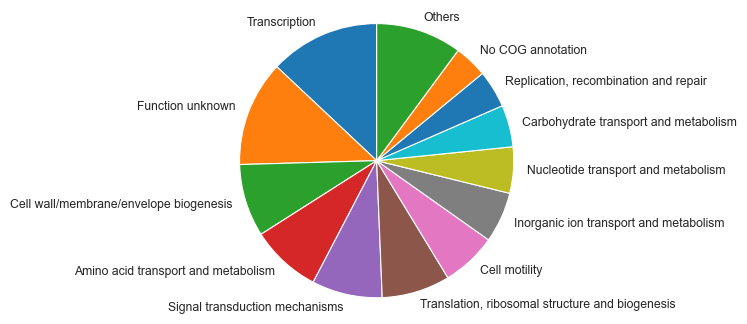

In [339]:
fig1, ax1 = plt.subplots()
ax1.pie(COG.cog, labels=COG.index, #autopct='%1.1f%%',
        shadow=False, startangle=90)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.show()

In [378]:
COG=COG.sort_values(by='cog')

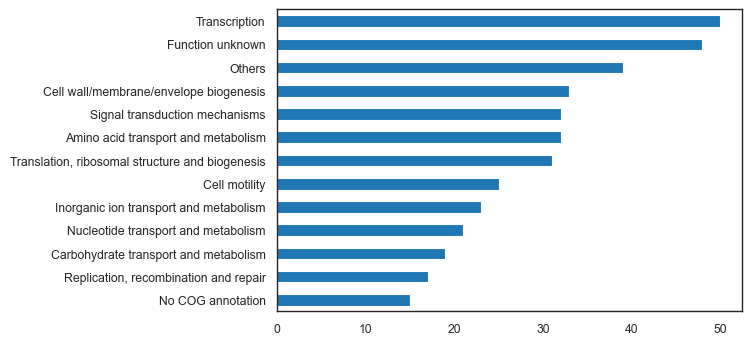

In [380]:
ax =COG.cog.plot.barh()

In [372]:
fig.get_figure().savefig('../Plots/COG_categories.svg')

# Merge if mutated genes are in the same TU


In [47]:
#In the gene info table, some operon information is missing. If missing, put "unknown"

In [48]:
k=1
for i in gene_table[gene_table.operon.isna()].index:
    gene_table.loc[i, 'operon']='unknown'+str(k)
    k=k+1

In [49]:
#Add operon information to unique_df

k=0
for i in unique_df.index:
    if gene_table[gene_table.gene_name==i].index.size > 0:
        unique_df.loc[i,'operon']=gene_table[gene_table.gene_name==i].iat[0,9]
    else:
        unique_df.loc[i,'operon']='temp'+str(k)
        k=k+1

In [50]:
# Find genes in the same operon, sum counts and leave only the first gene.

for i in unique_df.operon.unique(): 
    subset_df= unique_df[unique_df.operon==i]
    unique_df.loc[subset_df.index[0]]=subset_df.sum(axis=0)
    j=1 
    while j < subset_df.index.size:
        unique_df=unique_df.rename(index={subset_df.index[0]: subset_df.index[0]+'-'+subset_df.index[j]})
        unique_df=unique_df.drop(index=[subset_df.index[j]])
        j=j+1

In [51]:
unique_df=unique_df.drop(columns='operon')

In [52]:
unique_df

,HMDA1-10,HMDA2-1,HMDA3-4,HMDA5-4,HMDA7-1,HMDA8-5,PUTR2-4,PUTR3-1,PUTR4-3,PUTR5-1,...,NACL4-1,NACL5-1,NACL6-1,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1
thrA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
insA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
polB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leuA-leuL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ilvH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lgoR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
yjjQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rsmC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nadR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [53]:
#Reset all counts to 1
unique_df_1=unique_df.copy()

for i in unique_df_1.columns:
    for j in unique_df_1.index:
        if (unique_df_1.loc[j,i]>0.5):
            unique_df_1.loc[j,i]=1

In [54]:
unique_df_1.to_csv('unique_df.csv')

# Heatmap

In [55]:
mut_table=pd.read_csv("./unique_df.csv",index_col=0) #or unique_df

In [56]:
mut_table

,HMDA1-10,HMDA2-1,HMDA3-4,HMDA5-4,HMDA7-1,HMDA8-5,PUTR2-4,PUTR3-1,PUTR4-3,PUTR5-1,...,NACL4-1,NACL5-1,NACL6-1,GLU1-1,GLU2-1,GLU3-1,GLU4-1,GLU6-1,GLU7-1,GLU8-1
thrA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
insA,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
polB,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
leuA-leuL,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ilvH,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
lgoR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
yjjQ,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
rsmC,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
nadR,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
#show only genes mutated more than three times

In [58]:
count_sum=pd.DataFrame(mut_table.sum(axis=1))

In [59]:
mut_table['count_sum']=count_sum

In [60]:
table_to_show = mut_table[mut_table['count_sum']>3].drop(columns='count_sum')

In [61]:
# Parsing sample names again

In [62]:
condition2 = mapping[mapping['code'].isin(table_to_show.columns)].reset_index(drop=True)

In [63]:
condition2

,compound_n,ALE,Isolate,Replicate,code,compound,temp
0,1,1,1,1,BUT1-2,BUT,BUT_1
1,1,2,1,1,BUT2-9,BUT,BUT_2
2,1,3,1,1,BUT3-3,BUT,BUT_3
3,1,4,1,1,BUT4-4,BUT,BUT_4
4,1,5,1,1,BUT5-2,BUT,BUT_5
...,...,...,...,...,...,...,...
82,13,5,1,1,GLU3-1,GLU,GLU_5
83,13,6,1,1,GLU4-1,GLU,GLU_6
84,13,8,1,1,GLU6-1,GLU,GLU_8
85,13,9,1,1,GLU7-1,GLU,GLU_9


In [64]:
# Group mutations

In [65]:
condition.compound.unique()

array(['BUT', 'GLUT', 'COUM', 'HMDA', 'PUTR', 'ADIP', 'IBUA', 'HEXA',
       '23BD', '12PD', 'OCTA', 'NACL', 'GLU'], dtype=object)

In [66]:
#In the order of Osmotic pressure

condition_osmotic=[ 'NACL', '12PD', '23BD','PUTR',  'GLUT', 'ADIP', 'HMDA', 'BUT','IBUA', 'COUM','OCTA',  'HEXA', 
       'GLUT','GLU']

group_mut_table=pd.DataFrame()

for i in condition_osmotic:
    group_mut_table[i]=table_to_show[condition2[condition2.compound==i].code].sum(axis=1)

In [67]:
group_mut_table

,NACL,12PD,23BD,PUTR,GLUT,ADIP,HMDA,BUT,IBUA,COUM,OCTA,HEXA,GLU
mrdB-mrdA,0,0,0,1,0,0,0,0,0,1,2,1,0
nagC-nagA,4,0,0,1,6,3,3,0,0,0,0,0,0
ybjL,0,0,0,0,0,5,0,0,0,0,0,0,0
rpsA,0,1,1,3,0,0,1,0,0,0,0,0,0
hns,0,0,0,0,0,2,0,0,0,1,1,2,5
rnb,0,0,2,0,2,0,0,0,0,1,0,0,0
sapF-sapD,0,0,0,0,1,0,0,1,4,3,2,4,0
ydcD,3,0,0,0,0,1,0,0,0,0,0,0,0
marC,0,0,0,0,0,0,0,6,0,0,0,0,0
rnt-lhr,0,0,0,0,3,1,1,0,0,0,0,0,0


In [68]:
group_mut_table.to_csv("./mutation_frequency.csv")

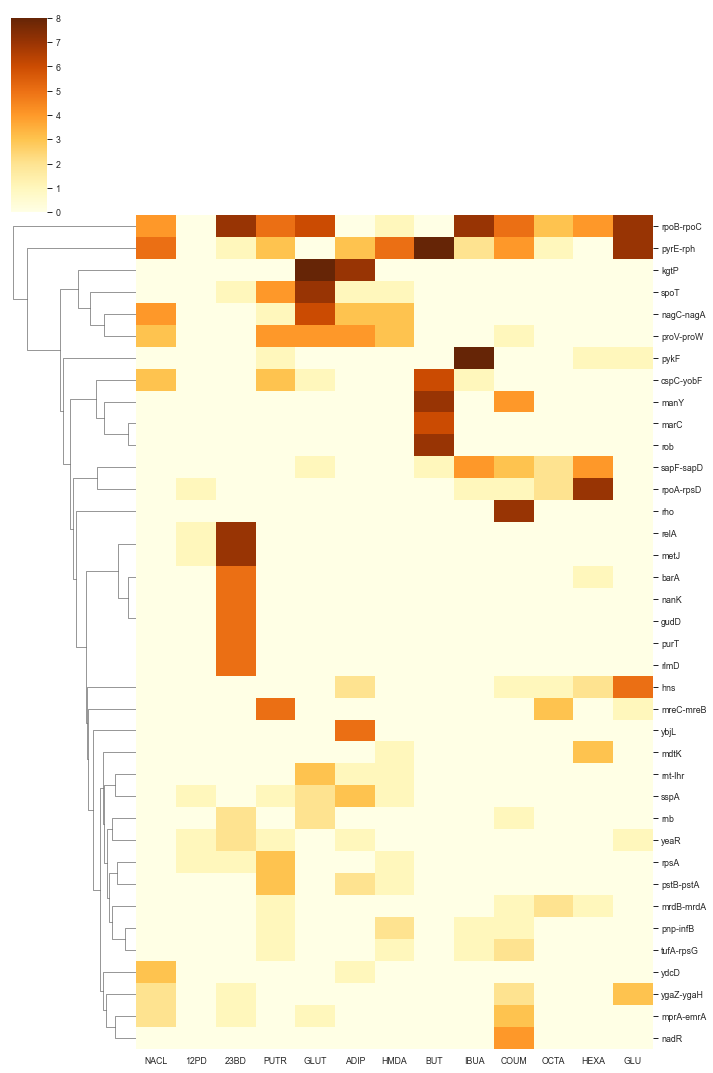

In [69]:
ax = sns.clustermap(group_mut_table, 
                    cmap="YlOrBr",
                   col_cluster=False,
                   #vmax=5,
                    figsize=(10, 15))

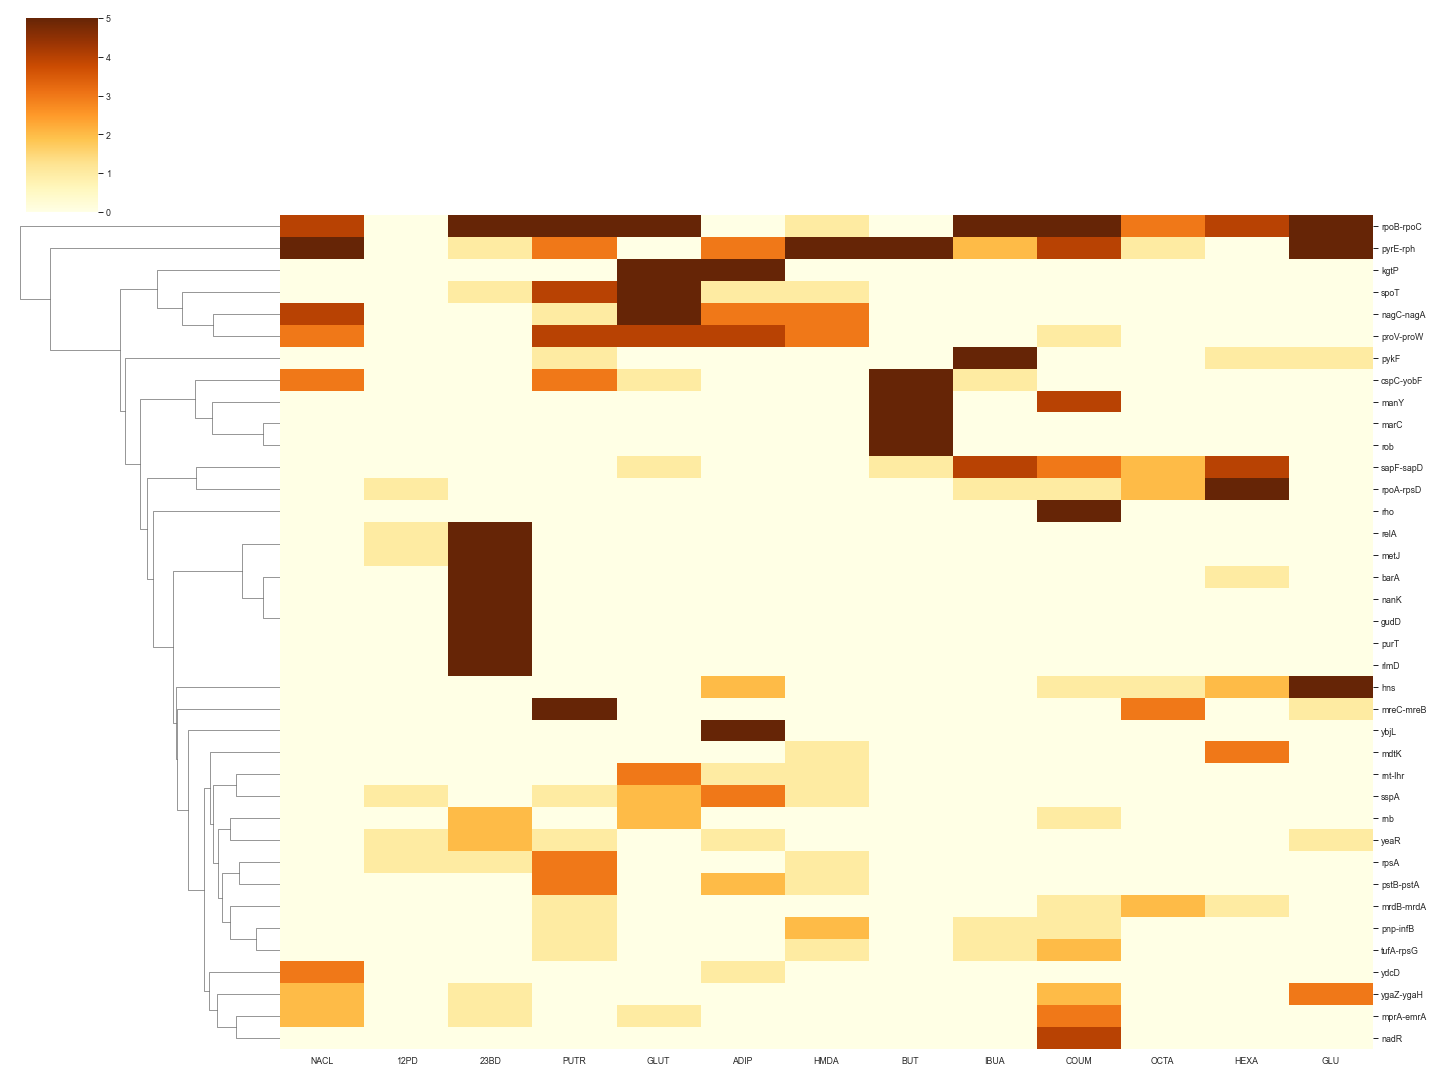

In [70]:
ax = sns.clustermap(group_mut_table, 
                    cmap="YlOrBr",
                   col_cluster=False,
                   vmax=5,
                    figsize=(20, 15))

In [71]:
# Show heatmap with ratios
group_mut_table_fraction = pd.DataFrame()

In [72]:
for chem in group_mut_table.columns:
    group_mut_table_fraction[chem] = group_mut_table[chem]/int(condition[condition['compound']==chem].compound.value_counts())

In [74]:
final_conc = {
    '12PD':1.09081351,
    '23BD':0.876599239,
    'HMDA':0.653988469,
    'PUTR':0.862166761,
    'GLUT':1.078564941,
    'ADIP':1.026413029,
    'HEXA':0.129132231,
    'OCTA':0.138686638,
    'COUM':0.243664717,
    'IBUA':0.286993457,
    'BUT':0.218623482,
    'NACL':1.72,
    'GLU':0
}

final_conc=pd.DataFrame(pd.Series(final_conc))
final_conc=final_conc.rename(columns={0:'conc'})

final_conc=final_conc.sort_values(by='conc', ascending=False) ##Re order by the final osmolarities
final_conc.index

Index(['NACL', '12PD', 'GLUT', 'ADIP', '23BD', 'PUTR', 'HMDA', 'IBUA', 'COUM',
       'BUT', 'OCTA', 'HEXA', 'GLU'],
      dtype='object')

In [75]:
# The order given is what ultimately ends up in the figure
group_mut_table_fraction.columns
#group_mut_table_fraction = group_mut_table_fraction[['NaCl', '12PD', '23BD', 'PUTR', 'GLUT', 'ADIP', 'HMDA', 'BUT', 'IBUA',   'COUM', 'OCTA', 'HEXA', 'GLUC']]
group_mut_table_fraction = group_mut_table_fraction[final_conc.index]
#group_mut_table_fraction

In [76]:
group_mut_table_fraction.head(2)

,NACL,12PD,GLUT,ADIP,23BD,PUTR,HMDA,IBUA,COUM,BUT,OCTA,HEXA,GLU
mrdB-mrdA,0.000000,0.0,0.00,0.000000,0.0,0.05,0.0,0.0,0.05,0.0,0.117647,0.05,0.0
nagC-nagA,0.666667,0.0,0.25,0.166667,0.0,0.05,0.2,0.0,0.00,0.0,0.000000,0.00,0.0


In [77]:
#group_mut_table_fraction.to_csv("./mutation_frequency_fraction.csv")

In [78]:
mut_feat_sum_df = group_mut_table.copy()
mut_feat_sum_df = mut_feat_sum_df.astype(int)
mut_feat_sum_df['sum'] = mut_feat_sum_df.sum(axis=1)
mut_feat_sum_df = mut_feat_sum_df[['sum']]
mut_feat_sum_df.head()

,sum
mrdB-mrdA,5
nagC-nagA,17
ybjL,5
rpsA,6
hns,11


In [175]:
palette = sns.color_palette(n_colors=12)
col_col = {
    '12PD':palette[0], #diols
    '23BD':palette[0],
    'HMDA':palette[1], #diamines
    'PUTR':palette[1],
    'GLUT':palette[2],
    'ADIP':palette[2],
    'HEXA':palette[3],
    'OCTA':palette[3],
    'COUM':palette[4],
    'IBUA':palette[4],
    'BUT':palette[4],
    'NACL':palette[5],
    'GLU':palette[6]
}
col_col=pd.Series(col_col)
col_col=col_col.reindex(final_conc.index)

In [180]:
temp = pd.DataFrame(index=group_mut_table_fraction.index)

In [181]:
for i in temp.index:
    temp.loc[i,'first_gene']=i.split("-")[0]
    temp.loc[i,'COG']=gene_table[gene_table.gene_name==temp.loc[i,'first_gene']].COG.values[0]

In [182]:
COG_unique=temp.COG.unique()

In [183]:
COG_dict = dict()
cnt=0
for index,val in enumerate(COG_unique): 
    COG_dict[COG_unique[cnt]]=palette[cnt]
    cnt=cnt+1

0
Cell wall/membrane/envelope biogenesis
1
Transcription
2
Inorganic ion transport and metabolism
3
Translation, ribosomal structure and biogenesis
4
No COG annotation
5
Intracellular trafficking, secretion, and vesicular transport
6
Nucleotide transport and metabolism
7
Carbohydrate transport and metabolism
8
Amino acid transport and metabolism
9
Signal transduction mechanisms
10
Coenzyme transport and metabolism


In [189]:
temp.cog_color=temp.COG.map(COG_dict)

/var/folders/80/k0yk5y8d0h92ybc8qhpcw3h40000gn/T/ipykernel_3542/1421910274.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  temp.cog_color=temp.COG.map(COG_dict)


Text(0.4, 0.9, 'Common mutations identified in evolved isolates')

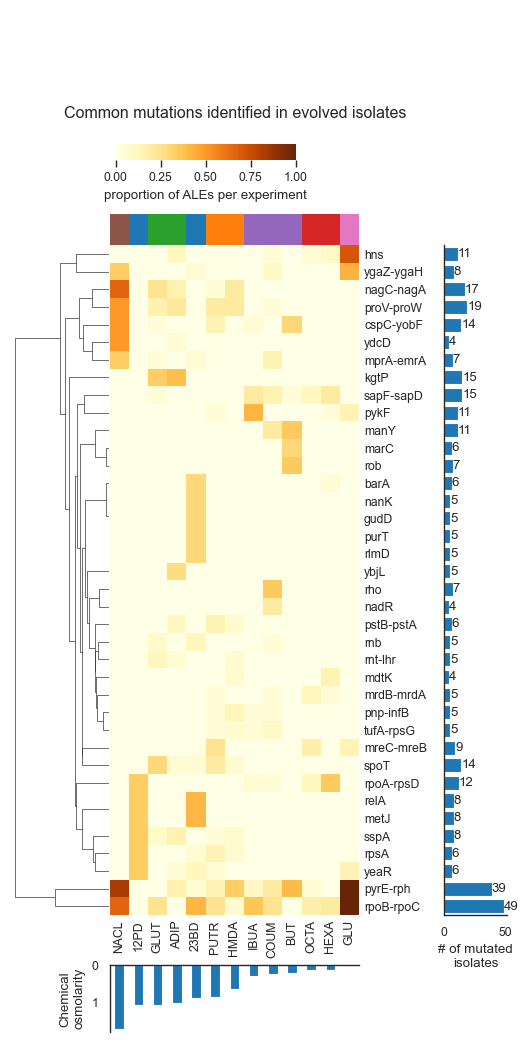

In [200]:
plt.rcParams["figure.dpi"] = 100
from mpl_toolkits.axes_grid1 import make_axes_locatable

cm = sns.clustermap(
    group_mut_table_fraction,
    cmap="YlOrBr",
    col_cluster=False,
        figsize=(6, 11),
    cbar_kws={'label': 'proportion of ALEs per experiment', 'orientation':'horizontal'},
    cbar_pos=(0.2, 0.85, 0.3, 0.015),
    col_colors=[col_col],
#    row_colors=temp.cog_color

#    dendrogram_ratio=0.1
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)


barplot_padding = 0.85
osmo_barplot_padding = 0.5

heatmap_space = make_axes_locatable(cm.ax_heatmap)
mut_cnt_ax = heatmap_space.append_axes("right", size="25%", pad=barplot_padding)
col_colors_space = make_axes_locatable(cm.ax_col_colors)
nax_col_clrs = col_colors_space.new_horizontal(size="25%", pad=barplot_padding)

osmolarity_ax = heatmap_space.append_axes("bottom", size="10%", pad=osmo_barplot_padding)
row_dendo_space = make_axes_locatable(cm.ax_row_dendrogram)
# nax_osmolarity = row_dendo_space.new_vertical(size="10%", pad=osmo_barplot_padding)

# pack_start describes on what end the dendogram padding is applied
nay = row_dendo_space.new_vertical(size="10%", pad=osmo_barplot_padding, pack_start=True)  

# Sort the values for the bar plot to have the same order as clusters
cm_y_tick_order = [t.get_text() for t in np.array(cm.ax_heatmap.get_yticklabels())]
mut_feat_sum_df = mut_feat_sum_df.reindex(cm_y_tick_order)
ax = mut_feat_sum_df.plot.barh(rot=0, stacked=True, ax=mut_cnt_ax, width=0.8)
ax.bar_label(ax.containers[0])
mut_cnt_ax.spines['top'].set_visible(False)
mut_cnt_ax.spines['right'].set_visible(False)
mut_cnt_ax.set_ylim(-0.5,len(group_mut_table_fraction.index)-0.5)  # needed to align bar-plots with clustermap residues
mut_cnt_ax.set_yticklabels([])
mut_cnt_ax.invert_yaxis()
mut_cnt_ax.set_xlabel("# of mutated\nisolates")
mut_cnt_ax.get_legend().remove()



#Add one more bar 
cm_x_tick_order = [t.get_text() for t in np.array(cm.ax_heatmap.get_xticklabels())]
final_conc=final_conc.reindex(cm_x_tick_order)
ax2 = final_conc.plot.bar(rot=0, stacked=True, ax=osmolarity_ax)
osmolarity_ax.invert_yaxis()
osmolarity_ax.spines['bottom'].set_visible(False)
osmolarity_ax.spines['right'].set_visible(False)
osmolarity_ax.set_ylabel("Chemical\nosmolarity")
osmolarity_ax.get_legend().remove()
osmolarity_ax.xaxis.set_visible(False)


col=cm.ax_col_dendrogram.get_position()
#cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.75, col.height*0.2])

col2=cm.ax_row_dendrogram.get_position()

#cm.ax_row_dendrogram.set_position([col2.x0, 0.17, col2.x1, col2.y1])


cm.fig.suptitle("Common mutations identified in evolved isolates",
                y=0.9,
                x=0.4
               )

In [199]:
cm.savefig('../Plots/Figure2_cluster.svg')

In [83]:
#Remove mutations if observed in the glucose condition

In [84]:
gluc_genes = group_mut_table_fraction[group_mut_table_fraction.GLU!=0].index
group_mut_table_fraction_woGlc=group_mut_table_fraction.drop(index=gluc_genes)
group_mut_table_fraction_woGlc=group_mut_table_fraction_woGlc.drop(columns={'GLU'})
mut_feat_sum_df_woGlc=mut_feat_sum_df.drop(index=gluc_genes)
final_conc_woGlc=final_conc.drop('GLU')

Text(0.4, 0.92, 'Common mutations identified in evolved isolates')

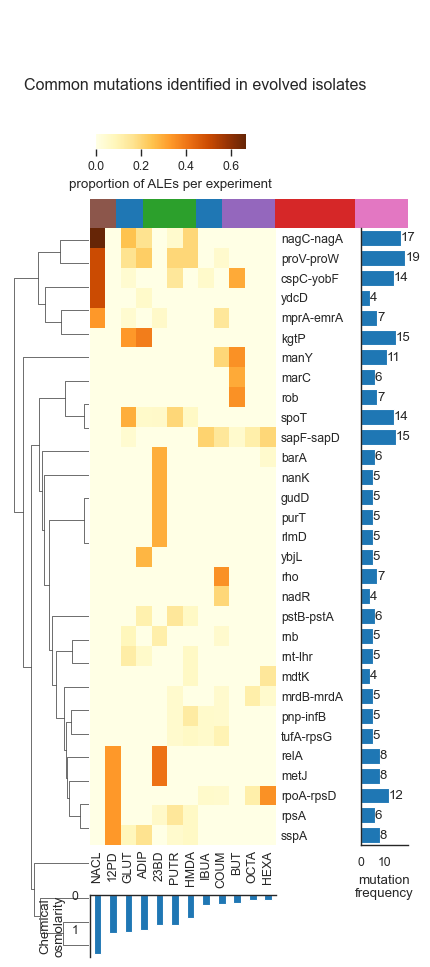

In [85]:
# group_mut_table
plt.rcParams["figure.dpi"] = 100
from mpl_toolkits.axes_grid1 import make_axes_locatable

cm = sns.clustermap(
    group_mut_table_fraction_woGlc,
    cmap="YlOrBr",
    col_cluster=False,
    figsize=(5, 10.25),
#        figsize=(5, 8),
    cbar_kws={'label': 'proportion of ALEs per experiment', 'orientation':'horizontal'},
#    cbar_pos=(0.2, 0.95, 0.3, 0.015),
    cbar_pos=(0.2, 0.85, 0.3, 0.015),
    col_colors=[col_col]

#    dendrogram_ratio=0.1
)
cm.ax_heatmap.tick_params(axis='both', which='both', length=0)


barplot_padding = 0.85
osmo_barplot_padding = 0.5

heatmap_space = make_axes_locatable(cm.ax_heatmap)
mut_cnt_ax = heatmap_space.append_axes("right", size="25%", pad=barplot_padding)
osmolarity_ax = heatmap_space.append_axes("bottom", size="10%", pad=osmo_barplot_padding)


# Sort the values for the bar plot to have the same order as clusters
cm_y_tick_order = [t.get_text() for t in np.array(cm.ax_heatmap.get_yticklabels())]
mut_feat_sum_df_woGlc = mut_feat_sum_df_woGlc.reindex(cm_y_tick_order)
ax = mut_feat_sum_df_woGlc.plot.barh(rot=0, stacked=True, ax=mut_cnt_ax, width=0.8)
ax.bar_label(ax.containers[0])
mut_cnt_ax.spines['top'].set_visible(False)
mut_cnt_ax.spines['right'].set_visible(False)
mut_cnt_ax.set_ylim(-0.5,len(group_mut_table_fraction_woGlc.index)-0.5)  # needed to align bar-plots with clustermap residues
mut_cnt_ax.set_yticklabels([])
mut_cnt_ax.invert_yaxis()
mut_cnt_ax.set_xlabel("mutation\nfrequency")
mut_cnt_ax.get_legend().remove()



#Add one more bar 

cm_x_tick_order = [t.get_text() for t in np.array(cm.ax_heatmap.get_xticklabels())]
final_conc_woGlc=final_conc_woGlc.reindex(cm_x_tick_order)
ax2 = final_conc_woGlc.plot.bar(rot=0, stacked=True, ax=osmolarity_ax)
osmolarity_ax.invert_yaxis()
osmolarity_ax.spines['bottom'].set_visible(False)
osmolarity_ax.spines['right'].set_visible(False)
osmolarity_ax.set_ylabel("Chemical\nosmolarity")
osmolarity_ax.get_legend().remove()
osmolarity_ax.xaxis.set_visible(False)


col=cm.ax_col_dendrogram.get_position()
#cm.ax_col_dendrogram.set_position([col.x0, col.y0, col.width*0.75, col.height*0.2])

col2=cm.ax_row_dendrogram.get_position()

#cm.ax_row_dendrogram.set_position([col2.x0, 0.17, col2.x1, col2.y1])


cm.fig.suptitle("Common mutations identified in evolved isolates",
                y=0.92,
                x=0.4
               )

In [86]:
cm.savefig('../Plots/Figure2_noGlc.svg')

In [87]:
cm.savefig('../Plots/Figure2_noGlc_row_cluster.svg')

In [88]:
COG = pd.DataFrame(index=group_mut_table_fraction.index, columns={'gene_name','COG','locus_tag','gene_product'})

In [89]:
for i in COG.index:
    #print()
    new_name=i.split('-')[0]
    COG.loc[i,'gene_name']=new_name
    COG.loc[i,'COG']=gene_table[gene_table.gene_name==new_name].COG.values[0]
    COG.loc[i,'gene_product']=gene_table[gene_table.gene_name==new_name].gene_product.values[0]
    

In [90]:
i

'rob'

In [91]:
COG

,gene_product,locus_tag,COG,gene_name
mrdB-mrdA,SEDS family protein MrdB,NaN,Cell wall/membrane/envelope biogenesis,mrdB
nagC-nagA,DNA-binding transcriptional dual regulator NagC,NaN,Transcription,nagC
ybjL,putative transport protein YbjL,NaN,Inorganic ion transport and metabolism,ybjL
rpsA,30S ribosomal subunit protein S1,NaN,"Translation, ribosomal structure and biogenesis",rpsA
hns,DNA-binding transcriptional dual regulator H-NS,NaN,Transcription,hns
rnb,RNase II,NaN,"Translation, ribosomal structure and biogenesis",rnb
sapF-sapD,putrescine ABC exporter ATP binding protein SapF,NaN,Inorganic ion transport and metabolism,sapF
ydcD,uncharacterized protein YdcD,NaN,No COG annotation,ydcD
marC,inner membrane protein MarC,NaN,"Intracellular trafficking, secretion, and vesi...",marC
rnt-lhr,RNase T,NaN,"Translation, ribosomal structure and biogenesis",rnt


In [92]:
COG['curated']=COG['COG']

In [93]:
import plotly.express as px

ModuleNotFoundError: No module named 'plotly'

In [ ]:
COG_data=pd.DataFrame(COG.curated.value_counts())
px.pie(COG_data,values='curated', names=COG_data.index)

In [ ]:
#Chemical tol only

In [ ]:
gluc_genes = group_mut_table_fraction[group_mut_table_fraction.GLUC!=0].index
group_mut_table_fraction_woGlc=group_mut_table_fraction.drop(index=gluc_genes)
group_mut_table_fraction_woGlc=group_mut_table_fraction_woGlc.drop(columns={'GLUC'})
mut_feat_sum_df_woGlc=mut_feat_sum_df.drop(index=gluc_genes)
final_conc_woGlc=final_conc.drop('GLUC')

In [ ]:
group_mut_table_fraction_woGlcNaCl=group_mut_table_fraction.drop(columns={'GLUC','NaCl'})
to_del=group_mut_table_fraction_woGlcNaCl[group_mut_table_fraction_woGlcNaCl.sum(axis=1)==0].index
group_mut_table_fraction_woGlcNaCl=group_mut_table_fraction_woGlcNaCl.drop(index=to_del)